Nonhomogeneous system: Before substitution


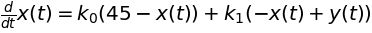

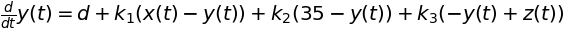

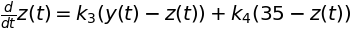


Nonhomogeneous system: After substitution


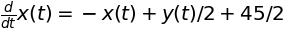

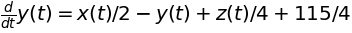

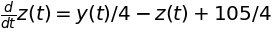


Associated homogeneous system


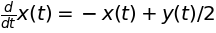

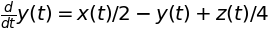

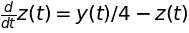


Eigenvalues, multiplicity and eigenvectors of the homogeneous system


⎡⎛       ⎡⎡-1/2⎤⎤⎞  ⎛            ⎡⎡ 2 ⎤⎤⎞  ⎛            ⎡⎡2 ⎤⎤⎞⎤
⎢⎜       ⎢⎢    ⎥⎥⎟  ⎜     √5     ⎢⎢   ⎥⎥⎟  ⎜     √5     ⎢⎢  ⎥⎥⎟⎥
⎢⎜-1, 1, ⎢⎢ 0  ⎥⎥⎟, ⎜-1 - ──, 1, ⎢⎢-√5⎥⎥⎟, ⎜-1 + ──, 1, ⎢⎢√5⎥⎥⎟⎥
⎢⎜       ⎢⎢    ⎥⎥⎟  ⎜     4      ⎢⎢   ⎥⎥⎟  ⎜     4      ⎢⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝            ⎣⎣ 1 ⎦⎦⎠  ⎝            ⎣⎣1 ⎦⎦⎠⎦


General solution to the homogeneous system that satisfies the initial conditions


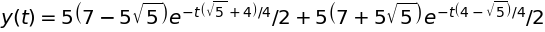


General solution to the nonhomogeneous system that satisfies the initial conditions (symbolic)


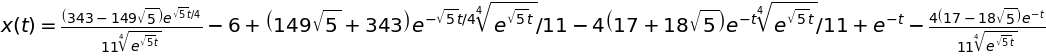

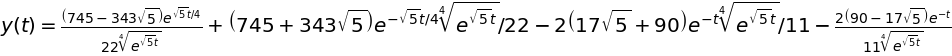

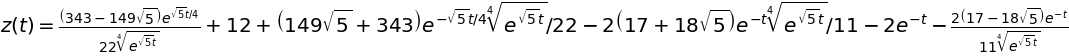


General solution to the nonhomogeneous system that satisfies the initial conditions (numeric)


In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
from sympy.solvers.ode.systems import canonical_odes, linear_ode_to_matrix

x, y, z = symbols('x y z', cls=Function)
t, k0, k1, k2, k3, k4, d = symbols("t k0 k1 k2 k3 k4 d")
funcs = [x(t), y(t), z(t)]; n = len(funcs)
ics = {x(0): 45, y(0): 35, z(0): 35}
model_vars = {k0: S(1)/2, k1: S(1)/2, k2: S(1)/4, k3: S(1)/4, k4: S(3)/4, d: 20}
RHS = [k0*(45-x(t)) + k1*(y(t)-x(t)), k1*(x(t)-y(t)) + k2*(35-y(t)) + k3*(z(t)-y(t)) + d, 
       k3*(y(t)-z(t)) + k4*(35-z(t))]
eqs = [0]*n; eqs_h = [0]*n; eqs_num = [0]*n

def print_eqs(eqs_disp):
  for i in range(n): display(eqs_disp[i])

print("Nonhomogeneous system: Before substitution")
for i in range(n): eqs[i] = Eq(funcs[i].diff(t), RHS[i])
print_eqs(eqs)

print("\nNonhomogeneous system: After substitution")
for i in range(n): eqs[i] = eqs[i].subs(model_vars)
print_eqs(eqs)

eqs1 = canonical_odes(eqs, funcs, t); eqs1 = eqs1[0]
(A1, A0), g = linear_ode_to_matrix(eqs1, funcs, t, 1); A = A0

print("\nAssociated homogeneous system")
for i in range(n): eqs_h[i] = Eq(funcs[i].diff(t), eqs[i].rhs - g[i])
print_eqs(eqs_h)

print("\nEigenvalues, multiplicity and eigenvectors of the homogeneous system")
display(A.eigenvects())

print("\nGeneral solution to the homogeneous system that satisfies the initial conditions")
soln_h = dsolve(eqs_h, funcs, ics=ics); print_eqs(soln_h)

print("\nGeneral solution to the nonhomogeneous system that satisfies the initial conditions (symbolic)")
soln = dsolve(eqs, funcs, ics=ics); print_eqs(soln)

print("\nGeneral solution to the nonhomogeneous system that satisfies the initial conditions (numeric)")
model_vars_num = {k0: 1/2, k1: 1/2, k2: 1/4, k3: 1/4, k4: 3/4, d: 20}
for i in range(n): 
  eqs_num[i] = Eq(funcs[i].diff(t), RHS[i].subs(model_vars_num))
soln_num = dsolve(eqs_num, funcs, ics=ics); print_eqs(soln_num)

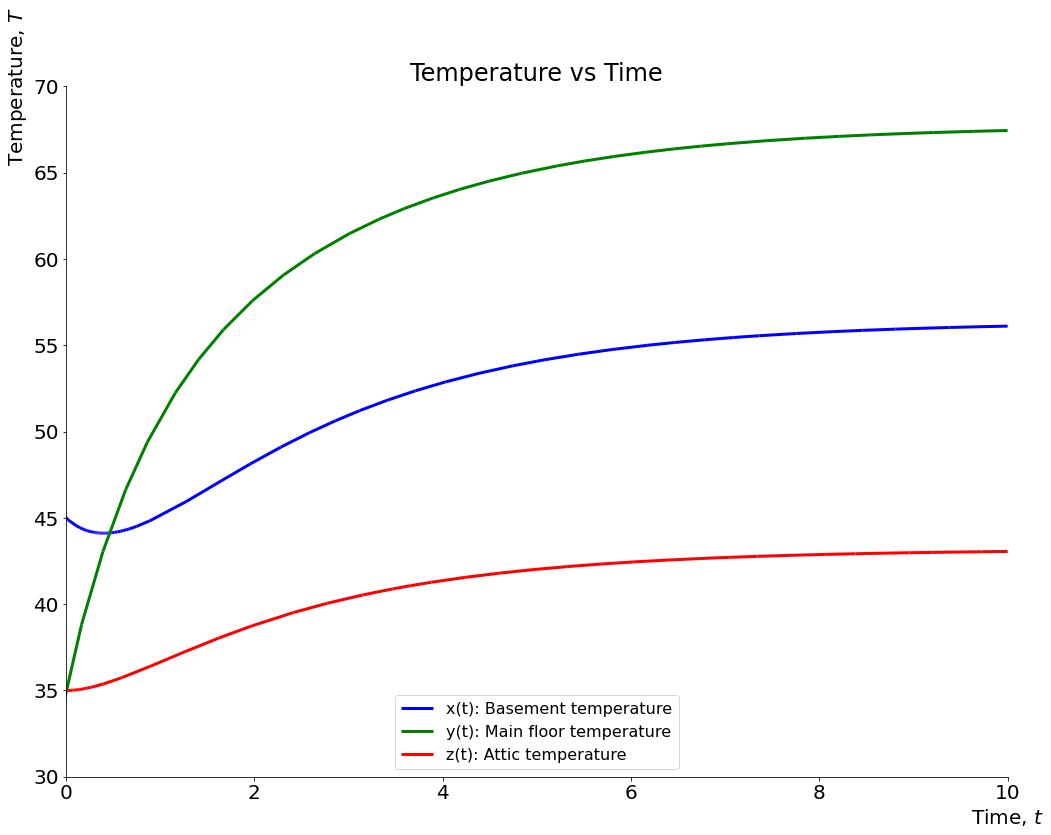

In [2]:
import matplotlib.pyplot as plt

p = plot(soln[0].rhs, show=False, axis_center=(0, 30), 
            xlim=[0, 10], ylim=[30, 70], size=(15, 12),
            title='Temperature vs Time', xlabel='Time, $t$',
            ylabel='Temperature, $T$', legend=True)
for i in range(1, n):
  p.extend(plot(soln[i].rhs, show=False))
col = ['b', 'g', 'r']; lab = ['Basement', 'Main floor', 'Attic']
for i in range(n): 
  p[i].line_color = col[i]
  p[i].label = str(funcs[i]) + ': ' + lab[i] + ' temperature'

plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=3
plt.rcParams['legend.loc'] = "lower center"
plt.rcParams['legend.fontsize']=16
plt.rcParams['savefig.transparent']='True'
plt.rcParams['savefig.dpi']=500

p.show()

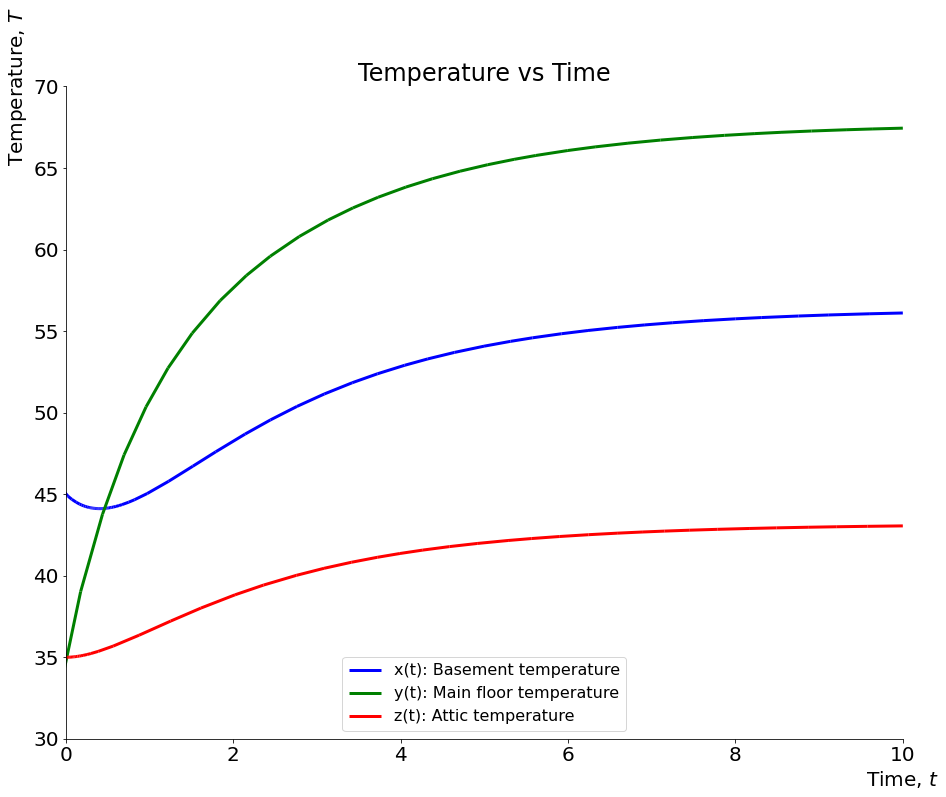

In [3]:
p.save('plot.png')